In [1]:
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def plot_maker(Z_ini, dt, t):
    iterations = int(t/dt)
    x, y, z = Z_ini
    sig = 10
    ro = 28
    bet = 8/3
    a = 1/np.sqrt(dt)
    g1 = a*(1/np.sqrt(2) - 1/2)
    g2 = a*(1/np.sqrt(3) - 1/2)
    g3 = a*(1/np.sqrt(5) - 1/2)
    gt = np.array([g1, g2, g3])
    f_z = np.array([sig*(y-x), x*(ro-z)-y, x*y-bet*z])
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x, y, z)
    for i in range(iterations):
        Z_new = Z_ini + dt*(f_z + gt)
        gt = np.array([2*g + a/2 if g >= -a/2 and g < 0 else -2*g + a/2 for g in gt])
        x, y, z = Z_new
        f_z = np.array([sig*(y-x), x*(ro-z)-y, x*y-bet*z])
        ax.scatter(x, y, z)
    plt.show()

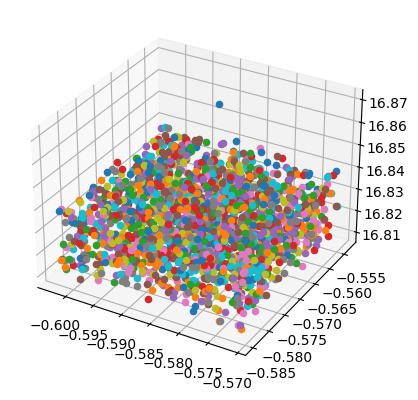

In [5]:
Z_ini = [-0.587,-0.563,16.870]
dt = 0.001
t = 2
plot_maker(Z_ini,dt,t)

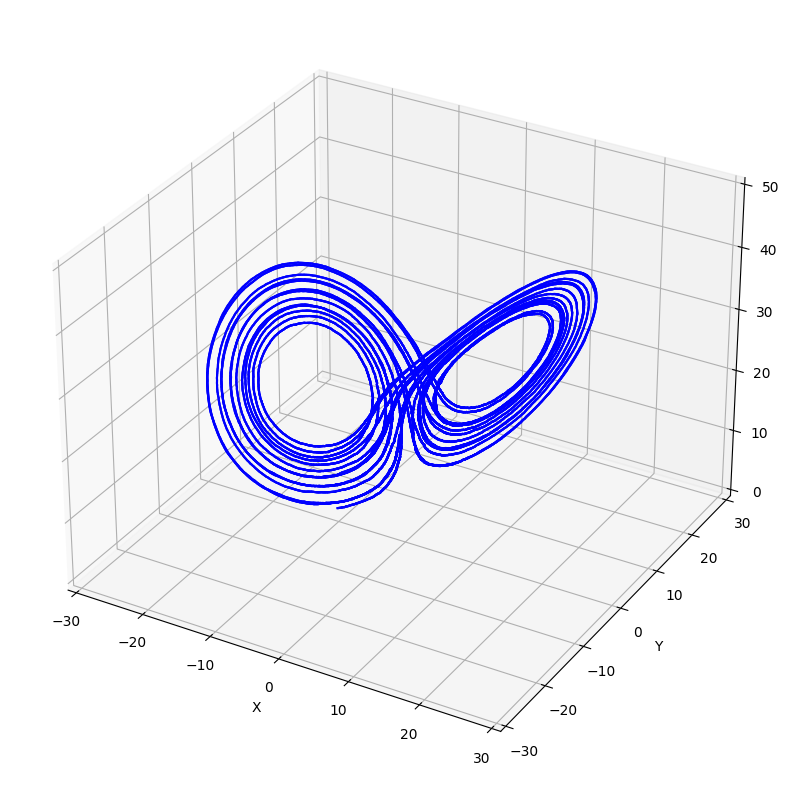

In [7]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

def plot_maker(Z_ini, dt, t):
    iterations = int(t/dt)
    x, y, z = Z_ini
    sig = 10
    ro = 28
    bet = 8/3
    a = 1/np.sqrt(dt)
    g1 = a*(1/np.sqrt(2) - 1/2)
    g2 = a*(1/np.sqrt(3) - 1/2)
    g3 = a*(1/np.sqrt(5) - 1/2)
    gt = np.array([g1, g2, g3])
    f_z = np.array([sig*(y-x), x*(ro-z)-y, x*y-bet*z])
    fig = plt.figure(figsize = (10,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot([x], [y], [z], color='blue', lw=1.5)
    for i in range(iterations):
        Z_new = Z_ini + dt*(f_z + gt)
        gt = np.array([2*g + a/2 if g >= -a/2 and g < 0 else -2*g + a/2 for g in gt])
        x, y, z = Z_new
        f_z = np.array([sig*(y-x), x*(ro-z)-y, x*y-bet*z])
        ax.plot([Z_ini[0], x], [Z_ini[1], y], [Z_ini[2], z], color='blue', lw=1.5)
        Z_ini = Z_new
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_xlim(-30,30)
    ax.set_ylim(-30,30)
    ax.set_zlim(0,50)
    plt.show()

Z_ini = [-0.587, -0.563, 16.870]
dt = 0.001
t = 20
plot_maker(Z_ini, dt, t)

In [6]:
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_maker(Z_ini, dt, t):
    device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
    iterations = int(t/dt)
    sig = 10
    ro = 28
    bet = 8/3
    a = 1/torch.sqrt(torch.tensor(dt, dtype=torch.float32, device=device))
    g1 = a*(1/torch.sqrt(torch.tensor(2, dtype=torch.float32, device=device)) - 1/2)
    g2 = a*(1/torch.sqrt(torch.tensor(3, dtype=torch.float32, device=device)) - 1/2)
    g3 = a*(1/torch.sqrt(torch.tensor(5, dtype=torch.float32, device=device)) - 1/2)
    gt = torch.tensor([g1, g2, g3], dtype=torch.float32, device=device)
    f_z = torch.tensor([sig*(Z_ini[1]-Z_ini[0]), Z_ini[0]*(ro-Z_ini[2])-Z_ini[1], Z_ini[0]*Z_ini[1]-bet*Z_ini[2]], dtype=torch.float32, device=device)
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Lorenz Attractor')
    ax.scatter(Z_ini[0], Z_ini[1], Z_ini[2])
    Z_new = torch.tensor(Z_ini, dtype=torch.float32, device=device)
    for i in range(iterations):
        Z_new = Z_new + dt*(f_z + gt) # get new Z co-ordinates by using Z-ini, vector field applied at Z_ini and initial force
        # Plotting these co-ordinates:
        gt = torch.where((gt >= -a/2) & (gt < 0), 2*gt+a/2, -2*gt+a/2) # update the force
        x,y,z = Z_new.tolist() #update the 3 states
        f_z = torch.tensor([sig*(y-x), x*(ro-z)-y, x*y-bet*z], dtype=torch.float32, device=device) # update the vector field
        ax.scatter(x,y,z, c='blue', alpha=0.05)
    
    plt.show()
    
Z_ini = [-0.587,-0.563,16.870]
dt = 0.001
t = 20
plot_maker(Z_ini,dt,t)

ModuleNotFoundError: No module named 'torch'